### Task to be covered

### 2. Python Libraries
1. Import Python Libraries

### 3. Reading & Understanding the data
1. Importing the input files
2. Inspecting the dataframes
3. Null Value Calculation

### 4. Data Cleanin
1. Year Imputation
2. Publisher Imputation

### 5. Exploratory Data Analysis
1. Overall Statistics
2. Year Wise Analysis
3. Publisher Wise Analysis
4. Platform Wise Analysis
5. Genre Wise Analysis
6. Global & Regional Sales Wise Analysis


In [1]:
##Installing Missingno Lib
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
##Data Analysis Library
import pandas as pd
import numpy as np
from collections import Counter
import missingno as mn


##Visualization Library
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user

[W 13:29:31 InstallContribNbextensionsApp] Config option `kernel_spec_manager_class` not recognized by `InstallContribNbextensionsApp`.
[I 13:29:31 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 13:29:31 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 13:29:31 InstallContribNbextensionsApp] Installing d:\users\13138\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 13:29:31 InstallContribNbextensionsApp] Up to date: C:\Users\13138\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 13:29:31 InstallContribNbextensionsApp] Up to date: C:\Users\13138\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 13:29:31 InstallContribNbextensionsApp] Up to date: C:\Users\13138\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 13:29:31 InstallContribNbextensionsApp] Up to date: C:\Users\13138\AppData\Roaming\jupyter\nbextensions

In [3]:
##Reading and understandding the Data

df=pd.read_csv("vgsales.csv")
print("Data Read")
df.head()

Data Read


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(f'Database_dimension {df.shape}')
print(f'Database size {df.size}')

Database_dimension (16598, 11)
Database size 182578


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

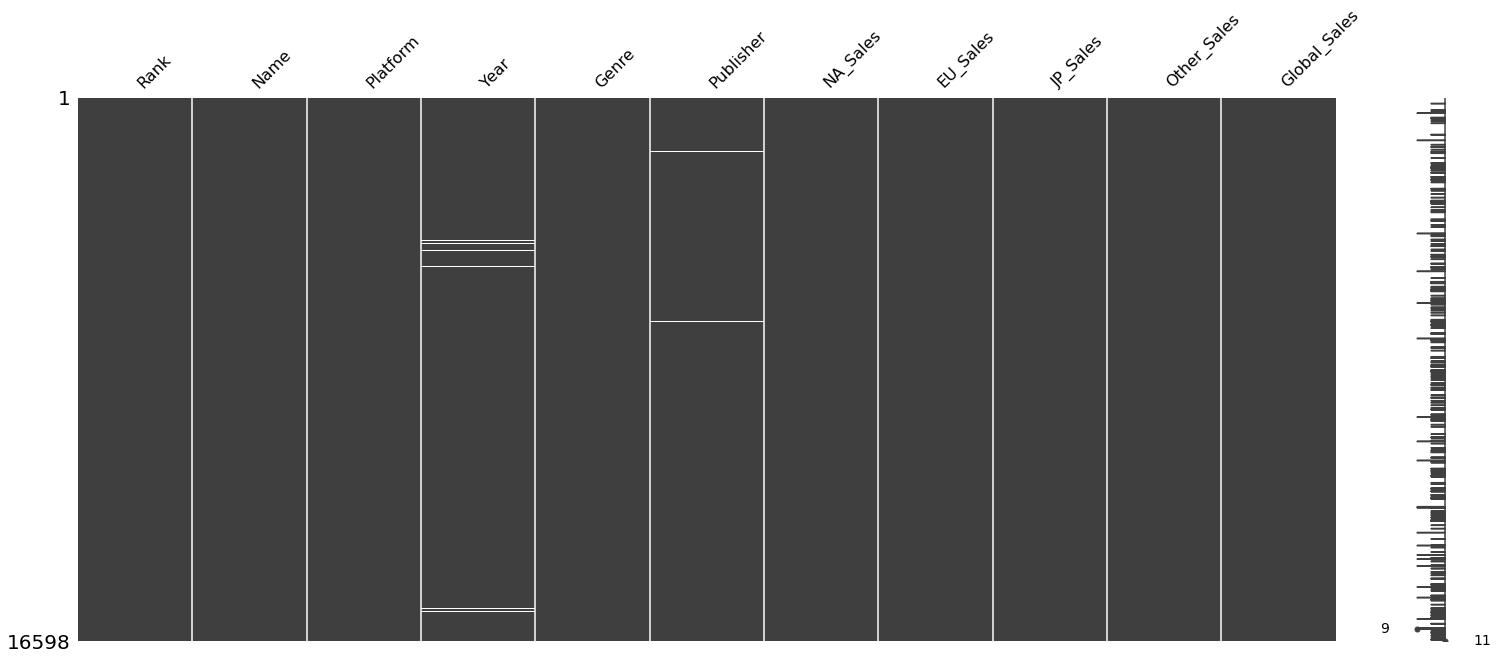

In [7]:
#checking for null value
mn.matrix(df)

In [8]:
#plotting the number of the null values in the column:
total_null_per=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
total_null_per.columns=["Columns","Null value %"]
total_null_per
total_null_values=pd.DataFrame(df.isnull().sum()).reset_index()
total_null_values.columns=["Columns","No. of Null Values"]

final_table=pd.merge(total_null_per,total_null_values, on="Columns")
final_table

,Columns,Null value %,No. of Null Values
0,Rank,0.000000,0
1,Name,0.000000,0
2,Platform,0.000000,0
3,Year,1.632727,271
4,Genre,0.000000,0
5,Publisher,0.349440,58
6,NA_Sales,0.000000,0
7,EU_Sales,0.000000,0
8,JP_Sales,0.000000,0
9,Other_Sales,0.000000,0


In [9]:
#Cleaning of Data
null_years=df["Year"].isnull()
df[null_years]["Global_Sales"].sort_values(ascending=False)
#we cannot ignore the all NaN values of years as they have a good gobal sales volumes therefore we will replace them with 2009


179      5.23
377      3.49
431      3.17
470      3.00
607      2.53
         ... 
16191    0.01
16065    0.01
16058    0.01
16057    0.01
16493    0.01
Name: Global_Sales, Length: 271, dtype: float64

In [10]:
#replacing the Nan values of years with 2009
df["Year"]=df["Year"].fillna(2009)
df["Year"]=df["Year"].astype(float)
df["Year"].isnull().sum()

0

In [11]:
## Working with publisher data
null_publisher=df["Publisher"].isnull()
df[null_publisher]["Global_Sales"].sort_values(ascending=False)


470      3.00
1303     1.46
1662     1.21
2222     0.93
3159     0.64
3166     0.64
3766     0.53
4145     0.48
4526     0.43
4635     0.42
5302     0.35
5647     0.32
6272     0.27
6437     0.27
6562     0.26
6648     0.25
6849     0.24
7208     0.22
7351     0.21
7470     0.21
7953     0.19
8330     0.17
8341     0.17
8368     0.17
8503     0.16
8896     0.15
8770     0.15
8848     0.15
9517     0.13
9749     0.12
10382    0.11
10494    0.10
11076    0.09
11526    0.08
12487    0.06
12517    0.06
13278    0.05
13672    0.04
13962    0.04
14087    0.04
14698    0.03
14311    0.03
14296    0.03
14942    0.02
15056    0.02
15261    0.02
15325    0.02
15353    0.02
15788    0.02
15915    0.02
16229    0.01
16494    0.01
16367    0.01
16543    0.01
16208    0.01
16198    0.01
16191    0.01
16553    0.01
Name: Global_Sales, dtype: float64

In [12]:
##From the data obtain we can see that the publisher data with NAN does not have great global sales data and therefore we 
#deelte all the NAN values of publisher data


df["Publisher"].isnull().sum()


58

In [13]:
df=df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Exploratory data analysis
#### Years wise video game release count

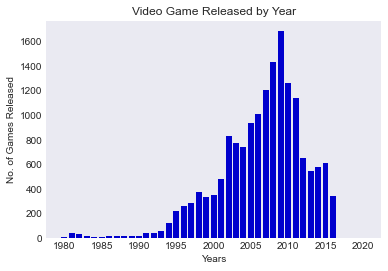

In [14]:
##Exploratory data analysis
##Years wise video game release count
hide_me
{
    "tags": [
        "hide_input",
    ]
}

##grouping the data by years
grp=df.groupby("Year")
yearwisecount=grp["Name"].count().reset_index()


#########
yearwisecount
plt.style.use("seaborn-dark")
plt.bar( yearwisecount["Year"], yearwisecount["Name"], color="mediumblue")
plt.title("Video Game Released by Year")
plt.xlabel("Years")
plt.ylabel("No. of Games Released")
plt.show()

### Videogame sales by release years

Text(0.5, 0, 'Years')

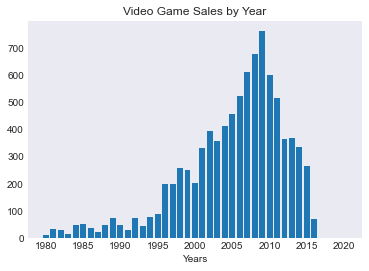

In [15]:
hide_me
##videogame sales by release years


yearwisesales=df.groupby("Year")["Global_Sales"].sum().reset_index()
plt.style.use("seaborn-dark")
plt.bar( yearwisesales["Year"], yearwisesales["Global_Sales"])
plt.title("Video Game Sales by Year")
plt.xlabel("Years")


### Publisher vs Number of Game released

In [16]:
##Plotting Graphs for Publisher vs Number of Game released

grp2=df.groupby("Publisher")["Name"].count().sort_values(ascending=False).reset_index()
#grp2.sort_values(by="Name",ascending=False)
grp2
#grp2.drop(index ,axis=1,inplace=True)

,Publisher,Name
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
...,...,...
573,EON Digital Entertainment,1
574,EA Games,1
575,DreamWorks Interactive,1
576,Rain Games,1


In [17]:
###
### tired using simple button functions with clicks available but was nnot able to make the button function read the function.
# ##Plotting the graphs for this with Buttons
# from matplotlib.widgets import Button
# # plt.figure(figsize=(20,10))

# # top_10=plt.bar(grp2["Publisher"][:10] ,grp2["Name"][:10])
# a=plt.bar(grp2["Publisher"][:20] ,grp2["Name"][:20] ,width=0.5)

# # top_20=plt.bar(grp2["Publisher"][:20] ,grp2["Name"][:20] ,width=0.5)
# # plt.xticks(rotation =-90)

# axButton=plt.axes([0.5,0.8,0.05,0.05]) ##left,botom,width,height
# btn1=Button( ax=axButton,
#             label="Top 20")

# def top_twenty(charts):
    
#     plt.xticks(rotation =-90)
#     plt.draw()
    
# btn1.on_clicked(top_twenty)


# # axButton2=plt.axes([0.70,0.8,0.05,0.05])
# bt2=Button( ax=axButton2,
#             label="Top 10")
# def top_ten(charts):
#     top_10=plt.bar(grp2["Publisher"][:10] ,grp2["Name"][:10])
#     plt.xticks(rotation =-90)
#     plt.show()

# bt2.on_clicked(top_ten)
    




# # #btn=Button()
# # #y_labels=
# # plt.show()

In [18]:
###using class for creating buttons
import tkinter as tk


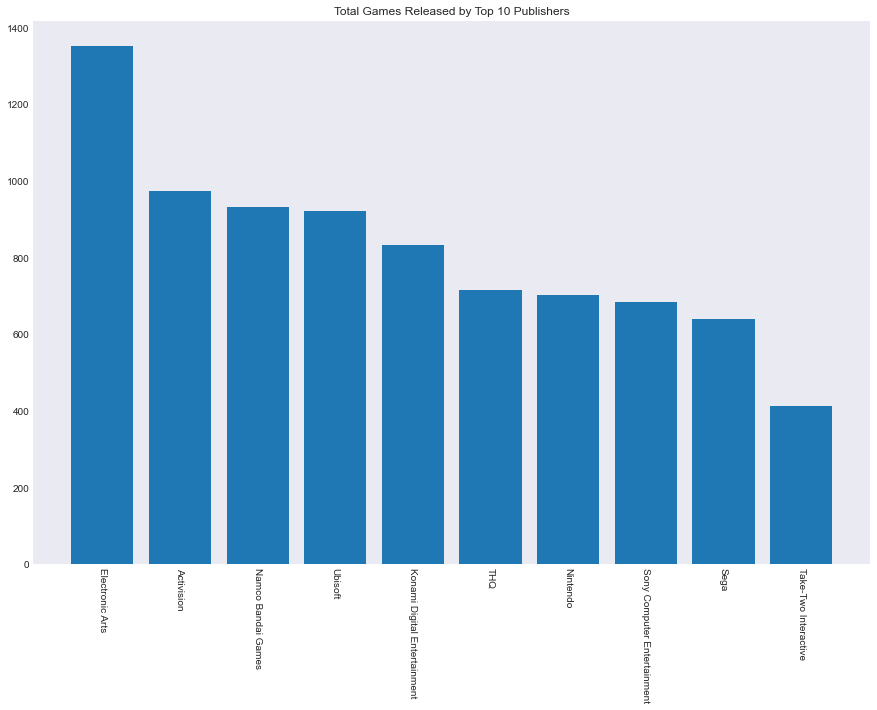

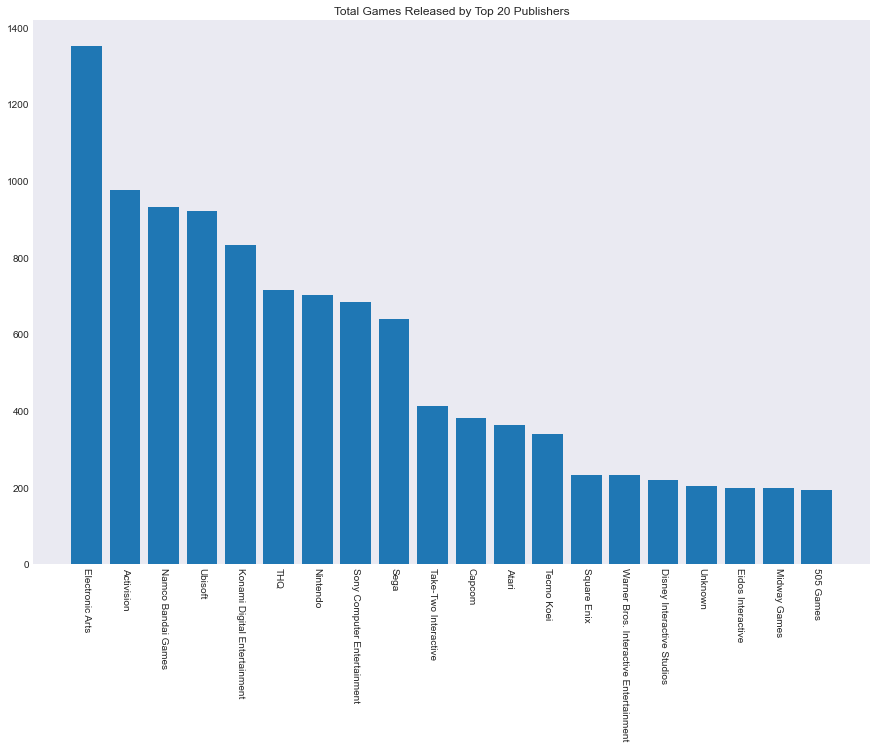

<Figure size 14400x14400 with 0 Axes>

In [19]:
class Display():
    
    
    ##constructor
    def __init__(self):
        self.root=tk.Tk() ##root window is created The root window is a main application window in our programs. It has a title bar and borders
        self.root.title("Buttons")

        ##Creating the Widgets
        self.btn1=tk.Button(self.root,text="Top_Ten", command=self.top_ten)
        self.btn2=tk.Button(self.root, text="Top_twenty", command=self.top_twenty)
        self.btn1.pack()
        self.btn2.pack()

        self.root.mainloop()

    
    def top_ten(self):
        plt.figure(figsize=(15,10))
        plt.bar(grp2["Publisher"][:10] ,grp2["Name"][:10])
        plt.xticks(rotation=-90)
        plt.title("Total Games Released by Top 10 Publishers")
        plt.show()
        
    def top_twenty(self):
        plt.figure(figsize=(15,10))
        plt.bar(grp2["Publisher"][:20] ,grp2["Name"][:20])
        plt.xticks(rotation =-90)
        plt.title("Total Games Released by Top 20 Publishers")
        plt.figure(figsize= (200, 200))
        plt.show()
    
  
display=Display()
        
        
     
    

### Publisher -- Game Sales

In [20]:
###Publisher Wise Game Sales
pub=df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
pub

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
...,...,...
573,Takuyo,0.01
574,Otomate,0.01
575,Epic Games,0.01
576,Inti Creates,0.01


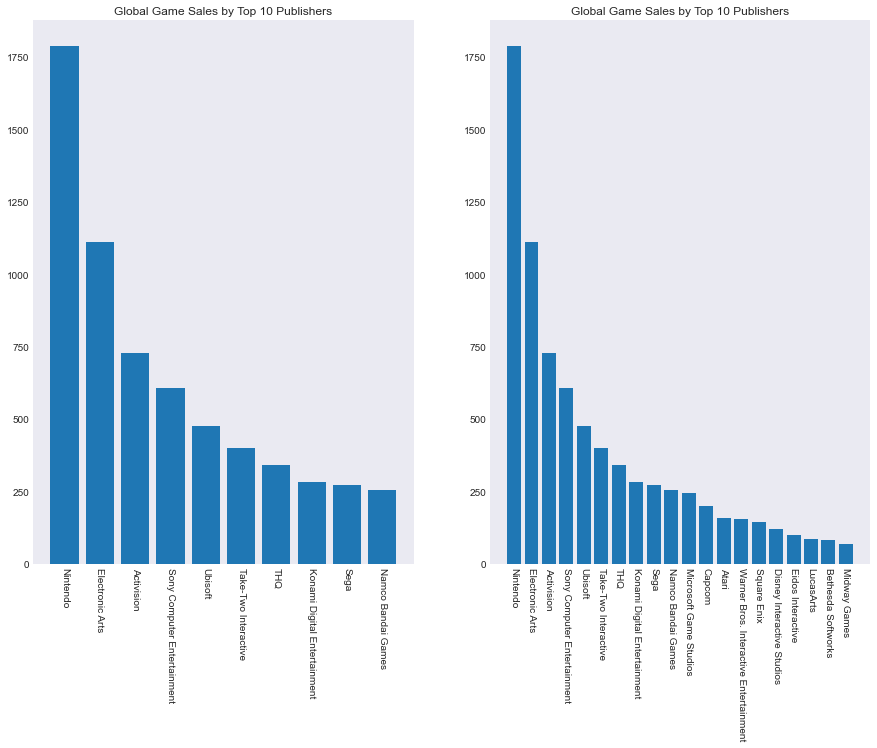

In [21]:

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.bar(pub["Publisher"][:10] ,pub["Global_Sales"][:10])
plt.xticks(rotation=-90)
plt.title("Global Game Sales by Top 10 Publishers")
# plt.figure(figsize=(15,15))
# plt.show()
# plt.subplot(122)
# plt.bar(pub["Publisher"][:20] ,pub["Global_Sales"][:20])

plt.subplot(1, 2, 2)
plt.bar(pub["Publisher"][:20] ,pub["Global_Sales"][:20])
plt.xticks(rotation=-90)
plt.title("Global Game Sales by Top 10 Publishers")

plt.show()

### Publisher yearly sales

In [22]:
##Calculating the Publisher sales by yearly sales

group_year=df[["Publisher","Global_Sales","Year"]]
group_year
group_year["Total Sales"]=group_year.groupby(["Publisher","Year"])["Global_Sales"].transform("sum")

<ipython-input-22-e79a7c8bc2da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_year["Total Sales"]=group_year.groupby(["Publisher","Year"])["Global_Sales"].transform("sum")


In [23]:
group_year

,Publisher,Global_Sales,Year,Total Sales
0,Nintendo,82.74,2006.0,205.61
1,Nintendo,40.24,1985.0,49.95
2,Nintendo,35.82,2008.0,91.22
3,Nintendo,33.00,2009.0,131.02
4,Nintendo,31.37,1996.0,73.70
...,...,...,...,...
16593,Kemco,0.01,2002.0,0.06
16594,Infogrames,0.01,2003.0,0.14
16595,Activision,0.01,2008.0,67.41
16596,7G//AMES,0.01,2010.0,0.01


In [24]:
group_year.drop("Global_Sales", axis=1,inplace=True)

D:\Users\13138\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
group_year

,Publisher,Year,Total Sales
0,Nintendo,2006.0,205.61
1,Nintendo,1985.0,49.95
2,Nintendo,2008.0,91.22
3,Nintendo,2009.0,131.02
4,Nintendo,1996.0,73.70
...,...,...,...
16593,Kemco,2002.0,0.06
16594,Infogrames,2003.0,0.14
16595,Activision,2008.0,67.41
16596,7G//AMES,2010.0,0.01


In [26]:
group_year=group_year[group_year["Year"]>=2012].sort_values(by="Year",ascending=False)

In [27]:
##Frommabove charts we know top 5 Publishers
top_five_pub=['Nintendo', 'Sony Computer Entertainment','Microsoft Game Studios','Electronic Arts',"Activision"]
group_year=group_year.loc[group_year["Publisher"].isin(top_five_pub)].sort_values(by="Year" ,ascending=False)
group_year

group_year=group_year.drop_duplicates()
group_year

,Publisher,Year,Total Sales
1727,Sony Computer Entertainment,2016.0,6.56
5056,Electronic Arts,2016.0,12.25
5015,Microsoft Game Studios,2016.0,1.42
2212,Nintendo,2016.0,3.47
14913,Activision,2016.0,3.67
243,Sony Computer Entertainment,2015.0,11.01
16542,Nintendo,2015.0,27.08
92,Electronic Arts,2015.0,45.42
101,Activision,2015.0,35.63
260,Microsoft Game Studios,2015.0,9.95


In [28]:

plt.style.use("seaborn-pastel")
def f(year):
    plt.figure(figsize=(15,5))
    plt.title("Yearly Game Sales by Top 5 Publisher")
    if year==2016:
        
        plt.bar(group_year["Publisher"][:5],group_year["Total Sales"][:5])
        plt.xticks(rotation=-90)
   
    elif year==2015:
        plt.bar(group_year["Publisher"][5:10],group_year["Total Sales"][5:10])
        plt.xticks(rotation=-90)
        
    elif year==2014:
        plt.bar(group_year["Publisher"][10:15],group_year["Total Sales"][10:15])
        plt.xticks(rotation=-90)
        
    elif year==2013:
        plt.bar(group_year["Publisher"][15:20],group_year["Total Sales"][15:20])
        plt.xticks(rotation=-90)
        
    elif year==2012:
        plt.bar(group_year["Publisher"][20:25],group_year["Total Sales"][20:25])
        plt.xticks(rotation=-90)
        
        
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
    
years=[2012,2013,2014,2015,2016]        
interact(f,year=years)    



interactive(children=(Dropdown(description='year', options=(2012, 2013, 2014, 2015, 2016), value=2012), Output…

<function __main__.f(year)>

### Over_all_Publisher Sales  Region Wise

In [29]:
##Over_all_Publisher Sales  Region Wise

group_region_NA=df.groupby("Publisher")["NA_Sales"].sum().sort_values(ascending=False)
group_region_NA=group_region_NA.reset_index()

group_region_EU=df.groupby("Publisher")["EU_Sales"].sum().sort_values(ascending=False)
group_region_EU=group_region_EU.reset_index()

group_region_JP=df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False)
group_region_JP=group_region_JP.reset_index()

group_region_Other=df.groupby("Publisher")["Other_Sales"].sum().sort_values(ascending=False)
group_region_Other=group_region_Other.reset_index()

group_region_Global=df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
group_region_Global=group_region_Global.reset_index()

Regions=["North America","Europe","Japan","Others","Global"]
def f(Region):
    plt.figure(figsize=(15,5))
    plt.title("Top 5 Publisher Region Wise Game Sales")
    if Region == "North America":
        plt.bar(group_region_NA["Publisher"][:5],group_region_NA["NA_Sales"][:5])
        plt.xticks(rotation=-90)
    elif Region == "Europe":
        plt.bar(group_region_EU["Publisher"][:5],group_region_EU["EU_Sales"][:5])
        plt.xticks(rotation=-90)
    elif Region == "Japan":
        plt.bar(group_region_JP["Publisher"][:5],group_region_JP["JP_Sales"][:5])
        plt.xticks(rotation=-90)
    elif Region=="Others":
        plt.bar(group_region_Other["Publisher"][:5],group_region_Other["Other_Sales"][:5])
        plt.xticks(rotation=90)
    elif Region=="Global":
        plt.bar(group_region_Global["Publisher"][:5],group_region_Global["Global_Sales"][:5])
        plt.xticks(rotation=-90)

        
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(f,Region=Regions)
    

interactive(children=(Dropdown(description='Region', options=('North America', 'Europe', 'Japan', 'Others', 'G…

<function __main__.f(Region)>

### Total Number of Games on Each Platform

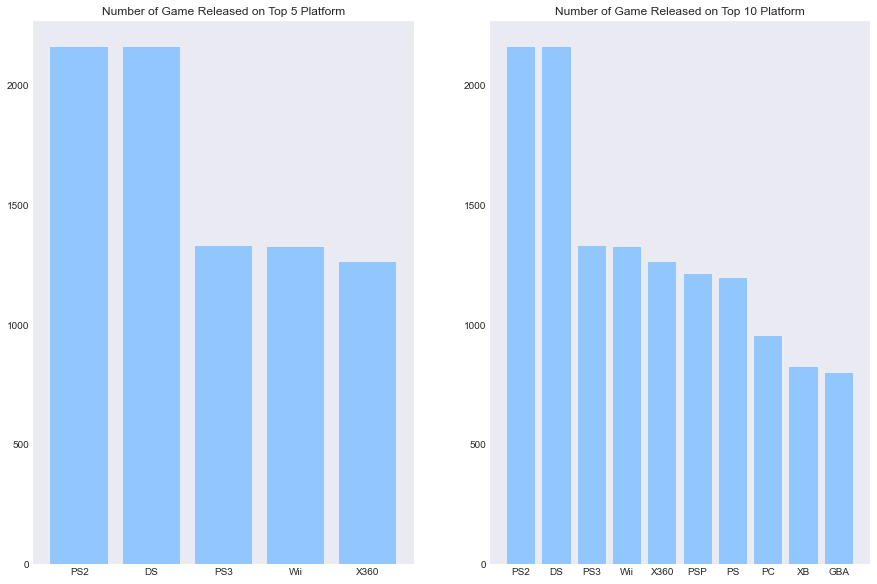

In [30]:
###Platform wise Game Analysis
## Total Number of Games on Each Platform

game_plat=df.groupby("Platform")["Name"].count().sort_values(ascending=False)
game_plat=game_plat.reset_index()
game_plat

plt.figure(figsize=(15,10))
##Top 5a nd Top 10 analysis
plt.subplot(1,2,1)
plt.bar(game_plat["Platform"][:5],game_plat["Name"][:5])
plt.title("Number of Game Released on Top 5 Platform")

plt.subplot(1,2,2)
plt.bar(game_plat["Platform"][:10],game_plat["Name"][:10])
plt.title("Number of Game Released on Top 10 Platform")


plt.show()

### Number of Games sales on per platform

In [31]:
##number of Games sales on per platform

pltf_sales=df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
pltf_sales

,Platform,Global_Sales
0,PS2,1252.43
1,X360,979.89
2,PS3,957.29
3,Wii,926.36
4,DS,822.19
5,PS,729.07
6,GBA,310.29
7,PSP,296.10
8,PS4,278.10
9,PC,258.46


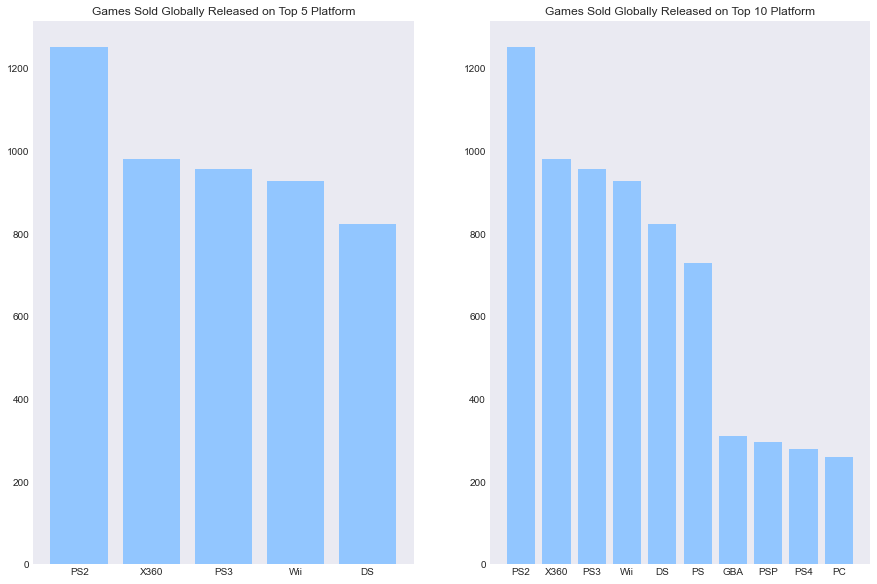

In [32]:
plt.figure(figsize=(15,10))
##Top 5a nd Top 10 analysis
plt.subplot(1,2,1)
plt.bar(pltf_sales["Platform"][:5],pltf_sales["Global_Sales"][:5])
plt.title("Games Sold Globally Released on Top 5 Platform")

plt.subplot(1,2,2)
plt.bar(pltf_sales["Platform"][:10],pltf_sales["Global_Sales"][:10])
plt.title("Games Sold Globally Released on Top 10 Platform")


plt.show()

### Platform word count()

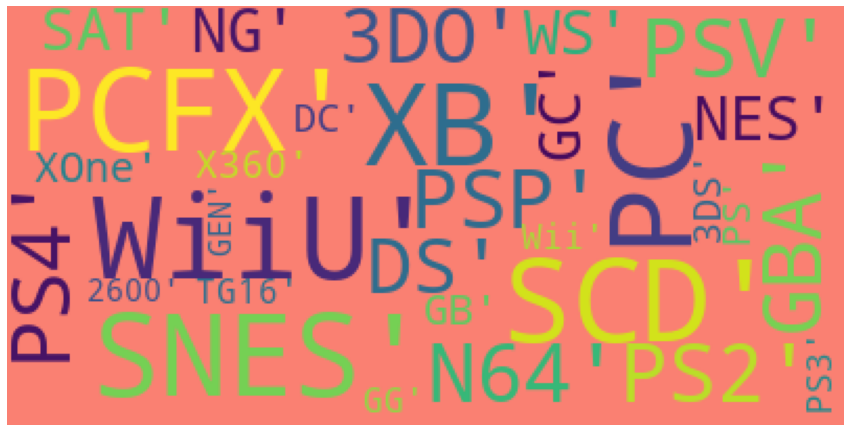

In [33]:
##Platform word count()
!pip install wordcloud
from wordcloud import WordCloud,ImageColorGenerator

words=list(set(df["Platform"]))
plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(max_font_size=55,max_words=100,background_color="salmon").generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###  Region Wise Game Sales by Platform

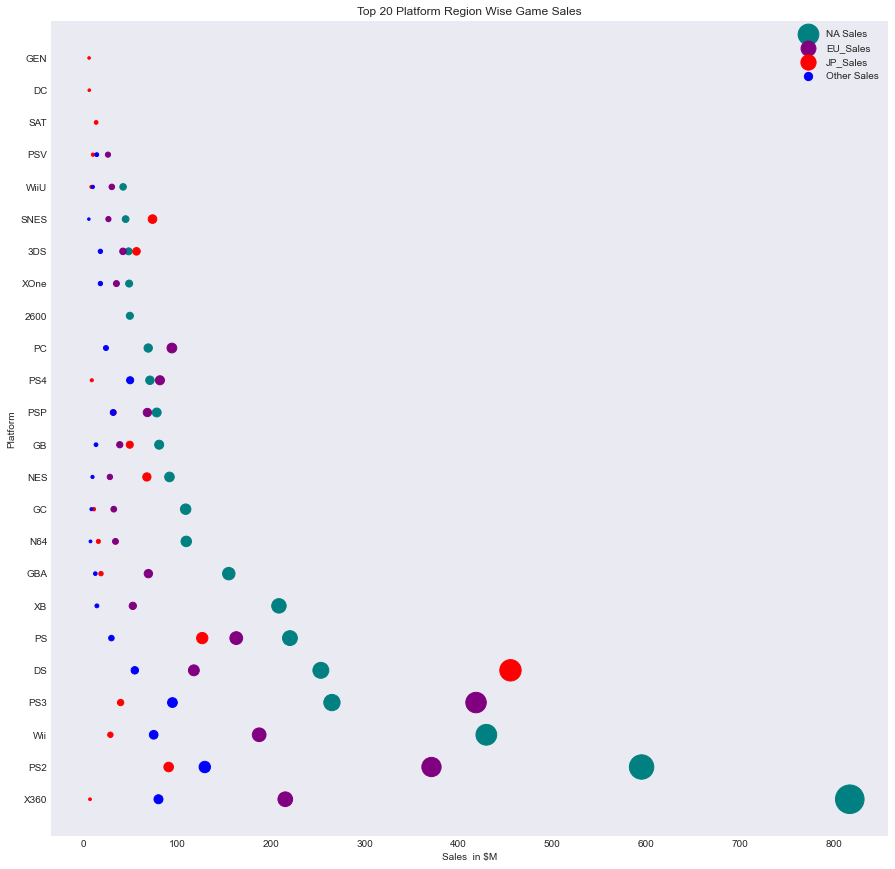

In [34]:
###  Region Wise Game Sales by Platform

reg_plt_NA =df.groupby("Platform")["NA_Sales"].sum().sort_values(ascending=False).reset_index()
reg_plt_NA

reg_plt_EU =df.groupby("Platform")["EU_Sales"].sum().sort_values(ascending=False).reset_index()

reg_plt_JP =df.groupby("Platform")["JP_Sales"].sum().sort_values(ascending=False).reset_index()

reg_plt_Other= df.groupby("Platform")["Other_Sales"].sum().sort_values(ascending=False).reset_index()


reg_plt_Global=df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

plt.title("Top 20 Platform Region Wise Game Sales")
plt.scatter(group_region_NA["NA_Sales"][:20],reg_plt_NA["Platform"][:20],s=group_region_NA["NA_Sales"][:20], color="Teal", label="NA Sales")
plt.scatter(group_region_EU["EU_Sales"][:20],reg_plt_EU["Platform"][:20],s=group_region_EU["EU_Sales"][:20], color="Purple", label="EU_Sales")
plt.scatter(group_region_JP["JP_Sales"][:20],reg_plt_JP["Platform"][:20],s=group_region_JP["JP_Sales"][:20], color="Red", label="JP_Sales")
plt.scatter(group_region_Other["Other_Sales"][:20],reg_plt_Other["Platform"][:20],s=group_region_Other["Other_Sales"][:20], color="Blue", label="Other Sales")
#plt.scatter(group_region_Global["Global_Sales"][:20],reg_plt_Global["Platform"][:20],s=group_region_Global["Global_Sales"][:20], color="Green", label="Global_Sales")
plt.legend()
plt.xlabel("Sales  in $M")
plt.ylabel("Platform")
plt.show()
# plt.scatter(group_region_EU["Global_Sales"][:5],group_region_EU["Global_Sales"][:5])
  






# plt.scatter(group_region_NA["NA_Sales"][:10],group_region_NA["Publisher"][:10],s=group_region_NA["NA_Sales"][:10],color="Teal")
 
# plt.scatter(group_region_JP["JP_Sales"][:10],group_region_JP["Publisher"][:10],s=group_region_JP["JP_Sales"][:10],color="Purple")
    
# plt.scatter(group_region_Other["Other_Sales"][:5],group_region_Other["Publisher"][:10])
# plt.scatter(group_region_Global["Global_Sales"][:5],group_region_Global["Publisher"][:10])


### Genre Wise Video Games

Text(0.5, 1.0, 'Genre Wise Game %s')

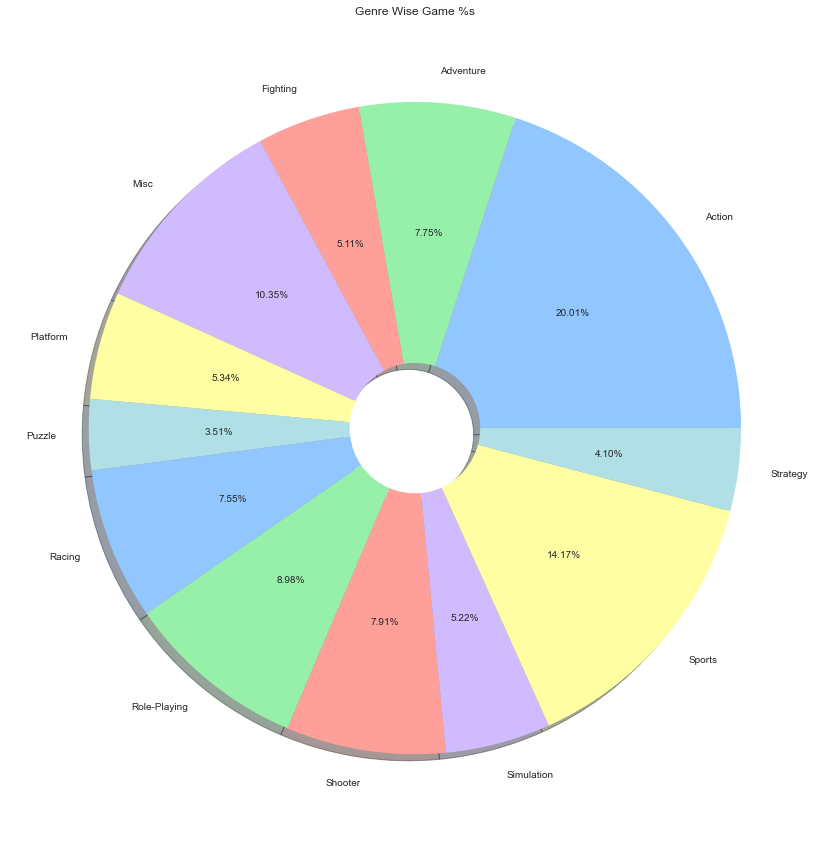

In [35]:
##Genre Wise video Games

plt_name=df.groupby("Genre")["Name"].count().reset_index()
plt_name["Name"]=plt_name["Name"].astype(float)
plt_name_Total=plt_name["Name"].sum()
plt_name_Total
plt_name["Percentage"]=plt_name["Name"]*100/plt_name_Total
plt_name



plt.pie(plt_name["Name"], labels=plt_name["Genre"], shadow=True,autopct='%1.2f%%',wedgeprops=dict(width=0.8))
plt.title("Genre Wise Game %s")

In [36]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Genre Wise Gobal_Sales

,Genre,Global_Sales
0,Action,1750.33
1,Adventure,238.77
2,Fighting,445.70
3,Misc,802.15
4,Platform,830.87
5,Puzzle,244.94
6,Racing,732.03
7,Role-Playing,927.31
8,Shooter,1037.32
9,Simulation,391.96


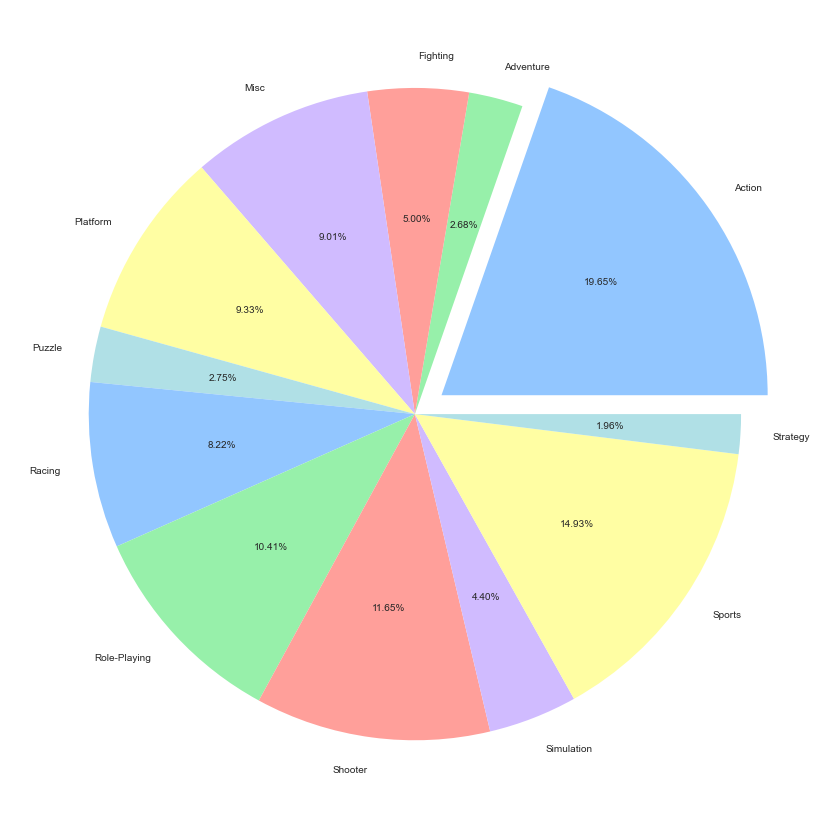

In [37]:
#Genre Wise Gobal_Sales
plt_global=df.groupby("Genre")["Global_Sales"].sum().reset_index()
plt.pie(plt_global["Global_Sales"],labels=plt_name["Genre"],autopct='%1.2f%%',explode=(0.1,0,0,0,0,0,0,0,0,0,0,0))
plt_global

### Top  5 games in Top 3 Category per Goabal sales

In [38]:
###Top  5 games in Top 3 Category per Goabal sales

#group_year["Total Sales"]=group_year.groupby(["Publisher","Year"])["Global_Sales"].transform("sum")

group_game=df[["Genre", "Name", "Global_Sales"]]
group_game
genre_game=group_game.groupby(["Genre","Name"])["Global_Sales"].sum().reset_index().sort_values(["Genre","Global_Sales"],ascending=(True,False))
genre_game

,Genre,Name,Global_Sales
638,Action,Grand Theft Auto V,55.92
641,Action,Grand Theft Auto: San Andreas,23.86
637,Action,Grand Theft Auto IV,22.47
642,Action,Grand Theft Auto: Vice City,16.19
479,Action,FIFA Soccer 13,16.16
...,...,...,...
11347,Strategy,Theatre Of War,0.01
11354,Strategy,Total War Attila: Tyrants & Kings,0.01
11364,Strategy,Tropico 3: Gold Edition,0.01
11378,Strategy,War for the Overworld,0.01


In [39]:
genre_s=df["Genre"].unique()
genre_sorted=sorted(genre_s)
print(f'List of : {genre_sorted}' )

List of : ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


In [40]:

#         if genre==group_game[group_game["Genre"]:
                             
#                               plt.bar(filt["Name"][:5],filt["Global_Sales"][:5])
                              
                             
                            
            
      #print(filt)
           
#f("Action")
                             
df2=df[["Genre", "Name", "Global_Sales"]]
#df2=df2.drop_duplicates(subset="Name")
df2
df2 = df2.groupby('Genre').apply(lambda x: x.nlargest(5,"Global_Sales")) \
                    .reset_index(drop=True) 

df2

# def f(genre):
#     plt.figure(figsize=(15,10))
    
#     for genre  in genre_sorted:
#         filt=df2[df2["Genre"]==genre]
#         plt.bar(df2["Name"][:5],df2["Global_Sales"][:5])
# f ("Action")    

#     if genre=="Action":
#         plt.bar(df2.Name[:5], df2.Global_Sales[:5])
        
#     elif genre=="Adventure":
#         plt.bar(df2.Name[5:10], df2.Global_Sales[:5])
        
    
        
    

# f("Action")
   
# plt.bar(df2.Name[:5], df2.Global_Sales[:5])
# plt.xlabel('x')
# plt.ylabel('% global')
# plt.show()





,Genre,Name,Global_Sales
0,Action,Grand Theft Auto V,21.40
1,Action,Grand Theft Auto: San Andreas,20.81
2,Action,Grand Theft Auto V,16.38
3,Action,Grand Theft Auto: Vice City,16.15
4,Action,Grand Theft Auto III,13.10
5,Adventure,Super Mario Land 2: 6 Golden Coins,11.18
6,Adventure,Assassin's Creed,5.55
7,Adventure,Assassin's Creed,4.83
8,Adventure,Zelda II: The Adventure of Link,4.38
9,Adventure,Rugrats: Search For Reptar,3.34


In [41]:
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Sales of Games on Different Platform for Three Regions

Text(0.5, 1.0, 'Sales of Games on Different Platform for Three Regions')

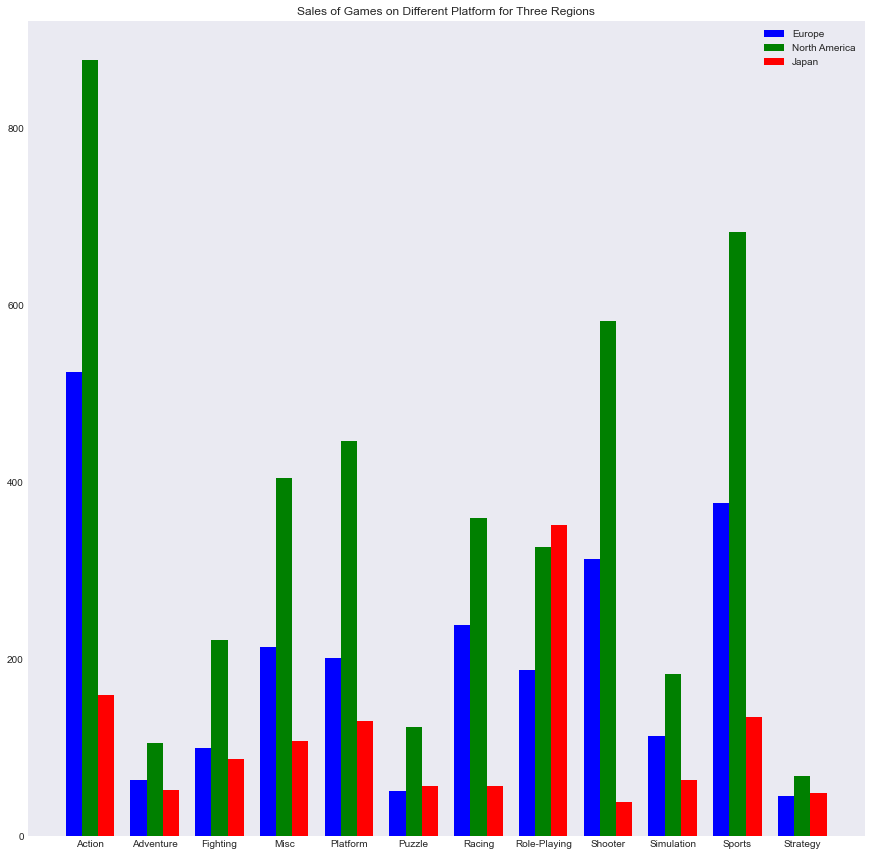

In [42]:
barwidth=0.25
x=np.arange(len(genre_sorted))
x

genre_sorted=sorted(genre_s)
na=df.groupby("Genre")["NA_Sales"].sum().reset_index()
na
eu=df.groupby("Genre")["EU_Sales"].sum().reset_index()
jp=df.groupby("Genre")["JP_Sales"].sum().reset_index()

plt.bar(x,eu["EU_Sales"],color="blue" ,width=barwidth,label="Europe")
plt.bar(x+barwidth,na["NA_Sales"],color="green",width=barwidth,label='North America')
plt.bar(x+2*barwidth,jp["JP_Sales"], color="red",width=barwidth, label='Japan' )#bottom=2)# na["NA_Sales"])

plt.xticks([r + barwidth for r in range(len(eu["EU_Sales"]))], 
           genre_sorted)
plt.legend()
plt.title("Sales of Games on Different Platform for Three Regions")


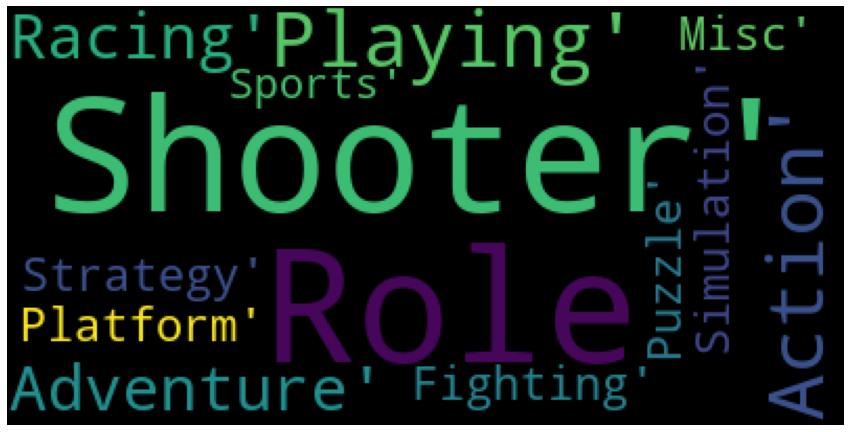

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(df['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=75, max_words=50,background_color="black").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Analysis the Top 5 games in each region

In [44]:
##Analysis the Top 5 games in each region

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

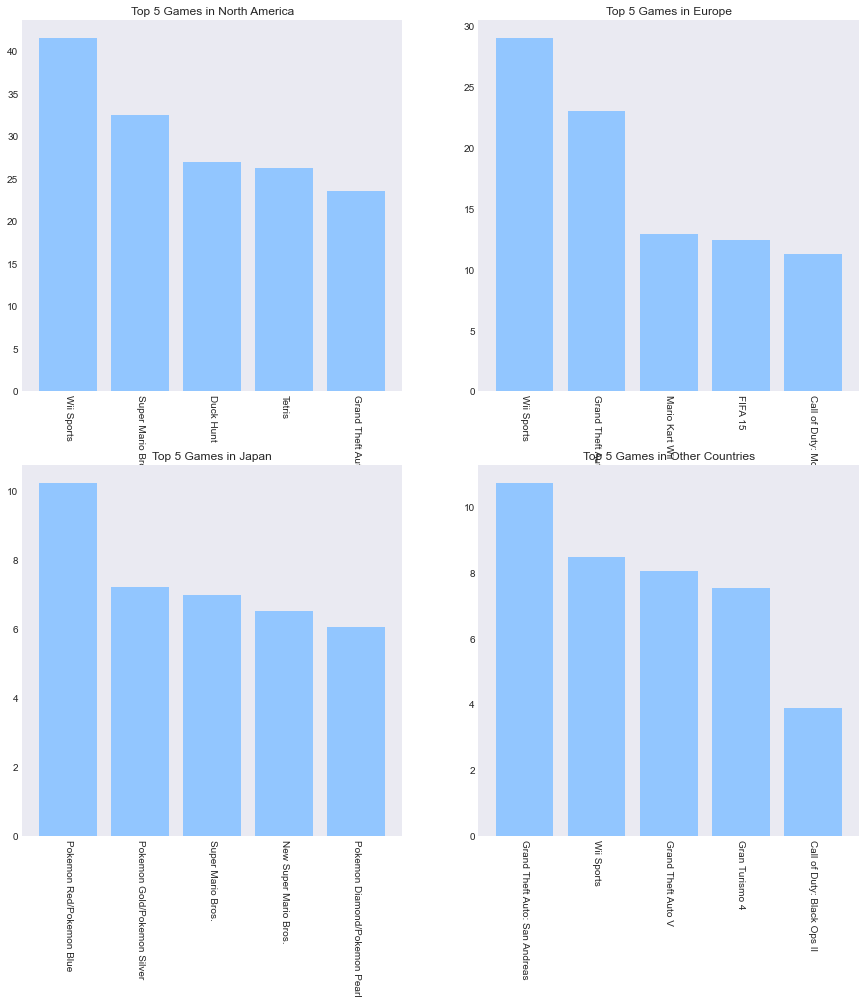

In [45]:
rank_NA=df.groupby("Name")["NA_Sales"].sum().reset_index().sort_values(by="NA_Sales",ascending=False)
rank_NA
rank_EU=df.groupby("Name")["EU_Sales"].sum().reset_index().sort_values(by="EU_Sales",ascending=False)
rank_JP=df.groupby("Name")["JP_Sales"].sum().reset_index().sort_values(by="JP_Sales",ascending=False)
rank_other=df.groupby("Name")["Other_Sales"].sum().reset_index().sort_values(by="Other_Sales",ascending=False)
plt.subplot(2,2,1)
plt.bar(rank_NA["Name"][:5],rank_NA["NA_Sales"][:5])
plt.title("Top 5 Games in North America")
plt.xticks(rotation=-90)

plt.subplot(2,2,2)
plt.bar(rank_EU["Name"][:5],rank_EU["EU_Sales"][:5])
plt.title("Top 5 Games in Europe")
plt.xticks(rotation=-90)
plt.subplot(2,2,3)
plt.bar(rank_JP["Name"][:5],rank_JP["JP_Sales"][:5])
plt.title("Top 5 Games in Japan")
plt.xticks(rotation=-90)
plt.subplot(2,2,4)
plt.bar(rank_other["Name"][:5],rank_other["Other_Sales"][:5])
plt.title("Top 5 Games in Other Countries")
plt.xticks(rotation=-90)



### Year Wise total Sales of Games for Each continent

D:\Users\13138\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
D:\Users\13138\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


interactive(children=(IntSlider(value=2013, description='year', max=2017, min=2010), Output()), _dom_classes=(…

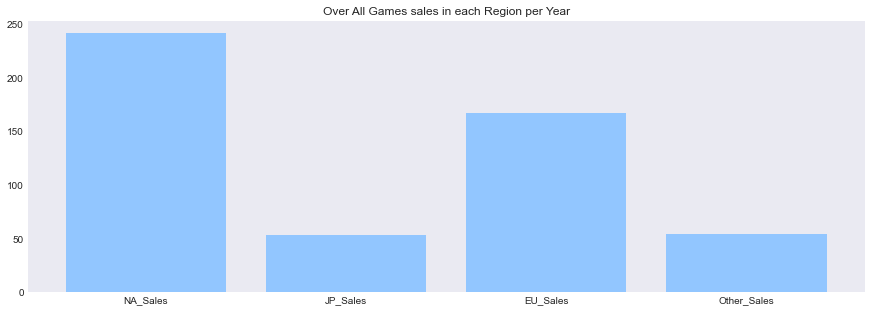

In [46]:
##Year Wise total Sales of Games for Each continent
%matplotlib inline

abc = df[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
abc[['NA_mean','EU_mean','JP_mean','Other_mean']]=abc.groupby("Year")[["NA_Sales","JP_Sales","EU_Sales","Other_Sales"]].transform("sum")
abc.drop(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],axis=1, inplace=True )
abc= abc.drop_duplicates()
abc=abc.sort_values(by="Year",ascending=False)
abc=abc.reset_index(drop=True)

abc
abc=abc.set_index("Year")
abc=abc.drop(2020, axis=0)
abc=abc.reset_index()
abc

years=range(2010,2018)


###
# def f(year):
#     if year not in range(2010, 2018):
#         return
#     plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[2017-year,1:5])
 



def f(year):
    plt.figure(figsize=(15,5))
    plt.title("Over All Games sales in each Region per Year")
    
    if year==2017:
           
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[0,1:5])
        
    
    elif year==2016:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[1,1:5])
        
    
    elif year==2015:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[2,1:5])
        
    
    elif year==2014:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[3,1:5])
        
    
    elif year==2013:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[4,1:5])
        
    
    elif year==2012:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[5,1:5])
        
    
    elif year==2011:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[6,1:5])
        
    
    elif year==2010:
        plt.bar(["NA_Sales","JP_Sales","EU_Sales","Other_Sales"],abc.iloc[7,1:5])
        
    

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(f,year=(2010,2017))
                    
    
f(2011)
# #abc.iloc[0,1:5]
####There is a bug in notebook and therefore it is plotting 2 graphs.#####
###2nd graph does no show any interaction and is a dummy which has been created by notebook due to some back end glitch
